In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.stats import multivariate_normal
import math
%matplotlib inline

# 2. Isocontours of Normal Distributions  
Reference: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html

In [2]:
def isocontours(mu, sig, x, y):
    pos = np.empty(x.shape + (2,)) 
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multivariate_normal(mu, sig) 
    fig = plt.figure()
    plot = fig.add_subplot(1.2,1.7,1) 
    return plot.contourf(x, y, rv.pdf(pos))

def two_isocontours(mu1, mu2, sig1, sig2, x, y):
    pos = np.empty(x.shape + (2,)) 
    pos[:, :, 0] = x
    pos[:, :, 1] = y 
    rv1 = multivariate_normal(mu1, sig1) 
    rv2 = multivariate_normal(mu2, sig2) 
    fig = plt.figure()
    plot = fig.add_subplot(1.2,1.7,1)
    return plot.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos))

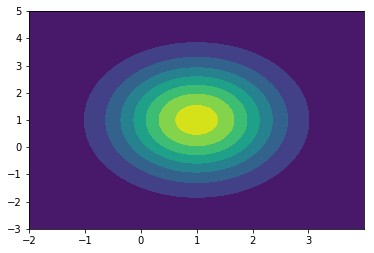

In [3]:
# (a)
mu = [1, 1]
sig = [[1,0],[0,2]]
x, y = np.mgrid[-2:4:.01, -3:5:0.01] 
a = isocontours(mu, sig, x, y)
a

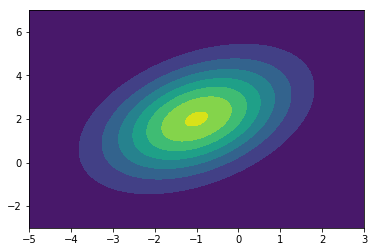

In [4]:
# (b)
mu = [-1, 2]
sig = [[2,1],[1,3]]
x, y = np.mgrid[-5:3:.01, -3:7:.01] 
b = isocontours(mu, sig, x, y)
b

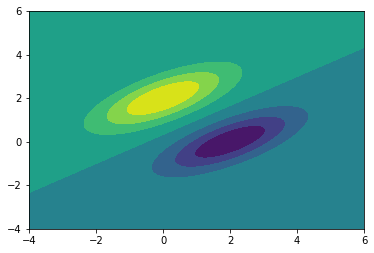

In [5]:
# (c)
mu1 = [0, 2]
mu2 = [2, 0]
sig = [[2,1],[1,1]]
x, y = np.mgrid[-4:6:.01, -4:6:.01] 
c = two_isocontours(mu1, mu2, sig, sig, x, y)
c

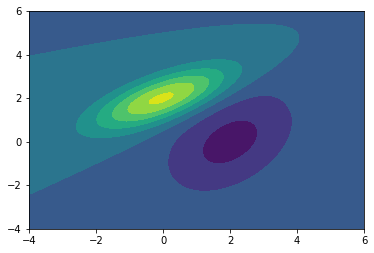

In [6]:
# (d)
mu1 = [0, 2]
mu2 = [2, 0]
sig1 = [[2,1],[1,1]]
sig2 = [[2, 1], [1, 3]]
x, y = np.mgrid[-4:6:.01, -4:6:.01] 
d = two_isocontours(mu1, mu2, sig1, sig2, x, y)
d

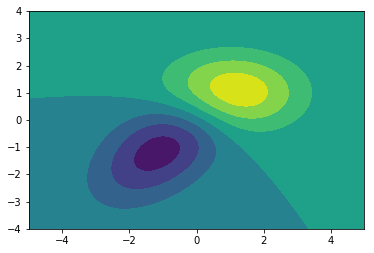

In [7]:
# (3)
mu1 = [1, 1]
mu2 = [-1, -1]
sig1 = [[2, 0],[0, 1]]
sig2 = [[2, 1], [1, 2]]
x, y = np.mgrid[-5:5:.01, -4:4:.01] 
e = two_isocontours(mu1, mu2, sig1, sig2, x, y)
e

# 3. Eigenvectors of the Gaussian Covariance Matrix

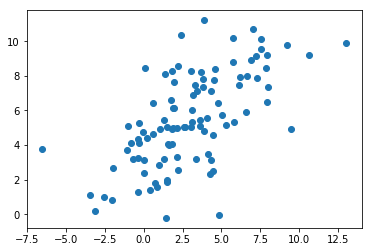

In [18]:
# randomly draw 100 sample points
n = 100
x1 = np.random.normal(3, 3, n)
x2 = 0.5 * x1 + np.random.normal(4, 2, n) 
fig, axes = plt.subplots()
axes.scatter(x1, x2)
plt.show()

In [19]:
# (a)
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
print("x1 mean = ", x1_mean)
print("x2 mean = ", x2_mean)

x1 mean =  2.95932073974
x2 mean =  5.49994510123


In [20]:
# (b)
m = np.cov(x1, x2)
print("Covariance Matrix = \n", m)

Covariance Matrix = 
 [[ 10.43613528   5.47600768]
 [  5.47600768   7.34461899]]


In [21]:
# (c)
evalue, evectors = np.linalg.eig(m)
print("Eigenvalues: \n", evalue)
print("Eigenvectors: \n", evectors)

Eigenvalues: 
 [ 14.58037084   3.20038344]
Eigenvectors: 
 [[ 0.79739029 -0.60346394]
 [ 0.60346394  0.79739029]]


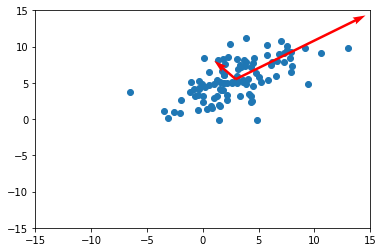

In [26]:
# (d)
arrow1 = evalue[0] * evectors[:,0] 
arrow2 = evectors[:, 1] * evalue[1] 

# Plot
fig, axes = plt.subplots()
axes.scatter(x1, x2)
plt.quiver(x1_mean, x2_mean, arrow1[0], arrow1[1], angles='xy', scale_units='xy', scale=1 ,color='r')
plt.quiver(x1_mean, x2_mean, arrow2[0], arrow2[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.axis([-15,15, -15,15])
plt.show()

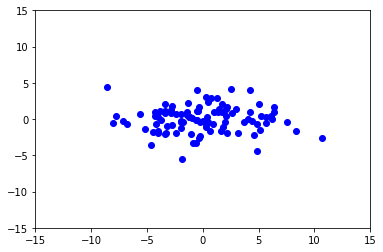

In [27]:
# (e)
x1_centered = np.reshape(np.subtract(x1, x1_mean), (len(x1), 1))
x2_centered = np.reshape(np.subtract(x2, x2_mean), (len(x2), 1)) 
x_centered = np.hstack([x1_centered, x2_centered])
x_rotated = []
for ptr in x_centered:
    new_ptr = np.matrix(evectors).T * np.reshape(ptr, (2, 1))
    x_rotated.append([new_ptr[0, 0], new_ptr[1, 0]])

x_rotated = np.array(x_rotated)
x1 = x_rotated[:, 0]
x2 = x_rotated[:, 1]

plt.axis([-15, 15, -15, 15]) 
plt.plot(x1, x2, 'bo') 
plt.show()